In [1]:
import yfinance as yf
import pandas_datareader.data as web
from fredapi import Fred
import datetime
import pandas as pd

### Making my raw numbers dataframe

In [2]:
ticker = '^GSPC'  # S&P 500
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2024, 12, 31)

In [3]:
# 1. Download daily stock data and convert to monthly
sp500 = yf.download(ticker, start=start, end=end, group_by='column')
sp500.sort_values('Date',ascending=True)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_51752\2125187268.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download(ticker, start=start, end=end, group_by='column')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000
...,...,...,...,...,...
2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000


In [4]:
sp500_monthly = sp500['Close']['^GSPC'].resample('MS').mean().to_frame(name='S&P500')
sp500_monthly

,S&P500
Date,
2010-01-01,1123.581582
2010-02-01,1089.159989
2010-03-01,1152.048690
2010-04-01,1197.316185
2010-05-01,1125.062006
...,...
2024-08-01,5478.214577
2024-09-01,5621.260449
2024-10-01,5792.319548


In [5]:
# 2. Download monthly economic indicators from FRED
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)
unemp = web.DataReader('UNRATE', 'fred', start, end)
fedfunds = web.DataReader('FEDFUNDS', 'fred', start, end)

In [6]:
# 3. Combine all into one monthly-aligned DataFrame
monthly_data = sp500_monthly.join([cpi, unemp, fedfunds])
monthly_data.columns = ['S&P500', 'CPI', 'Unemployment(%)', 'InterestRate(%)']
monthly_data = monthly_data.dropna()

monthly_data=monthly_data.reset_index()
monthly_data

,Date,S&P500,CPI,Unemployment(%),InterestRate(%)
0,2010-01-01,1123.581582,217.488,9.8,0.11
1,2010-02-01,1089.159989,217.281,9.8,0.13
2,2010-03-01,1152.048690,217.353,9.9,0.16
3,2010-04-01,1197.316185,217.403,9.9,0.20
4,2010-05-01,1125.062006,217.290,9.6,0.20
...,...,...,...,...,...
175,2024-08-01,5478.214577,314.131,4.2,5.33
176,2024-09-01,5621.260449,314.851,4.1,5.13
177,2024-10-01,5792.319548,315.564,4.1,4.83
178,2024-11-01,5929.915991,316.449,4.2,4.64


In [7]:
tickers = ["XLK", "XLV", "XLF", "XLE"]

data = yf.download(tickers, start=start, end=end, group_by='ticker')

monthly_sectors = pd.DataFrame()

for ticker in tickers:
    monthly_sectors[ticker] = data[ticker]['Close'].resample('MS').mean()

# Rename columns to readable names
monthly_sectors.rename(columns={
    "XLK": "Technology",
    "XLV": "Healthcare",
    "XLF": "Financials",
    "XLE": "Energy"
}, inplace=True)

# Merge with your original monthly_data
monthly_data = monthly_data.merge(monthly_sectors, on='Date')

# Final check
monthly_data

C:\Users\Andrew\AppData\Local\Temp\ipykernel_51752\3318557344.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end, group_by='ticker')
[*********************100%***********************]  4 of 4 completed


,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
0,2010-01-01,1123.581582,217.488,9.8,0.11,18.203108,24.497270,9.108149,35.065616
1,2010-02-01,1089.159989,217.281,9.8,0.13,17.354142,24.006555,8.775492,33.583454
2,2010-03-01,1152.048690,217.353,9.9,0.16,18.406723,24.666952,9.590398,34.669048
3,2010-04-01,1197.316185,217.403,9.9,0.20,19.213259,24.404023,10.188232,36.243685
4,2010-05-01,1125.062006,217.290,9.6,0.20,18.032466,22.953140,9.409370,33.420227
...,...,...,...,...,...,...,...,...,...
175,2024-08-01,5478.214577,314.131,4.2,5.33,213.076671,149.850553,42.728505,86.663058
176,2024-09-01,5621.260449,314.851,4.1,5.13,216.544881,152.608850,44.403516,84.542666
177,2024-10-01,5792.319548,315.564,4.1,4.83,227.260460,149.391653,45.935695,88.457450
178,2024-11-01,5929.915991,316.449,4.2,4.64,231.115023,144.071209,48.993115,91.930761


### Plot of all years for raw dataframe

In [8]:
monthly_data_describe=monthly_data.describe()
monthly_data_describe

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
count,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2017-06-16 07:44:00,2727.825704,254.132222,5.798333,1.229278,76.384201,75.307407,21.568864,52.316612
min,2010-01-01 00:00:00,1079.803336,217.199000,3.400000,0.050000,17.354142,22.224449,7.756983,24.786234
25%,2013-09-23 12:00:00,1711.813275,233.637750,3.900000,0.090000,28.039520,42.638508,13.283105,43.569578
50%,2017-06-16 00:00:00,2444.043977,244.218000,5.000000,0.190000,51.733209,68.856501,20.340303,48.433623
75%,2021-03-08 18:00:00,3858.748401,265.291500,7.525000,1.822500,126.198447,109.508919,30.516225,55.610323
max,2024-12-01 00:00:00,6017.372485,317.603000,14.800000,5.330000,236.881937,152.608850,48.993115,92.242920
std,NaN,1266.888226,28.459529,2.236829,1.717344,59.400883,38.028627,10.187999,15.455462


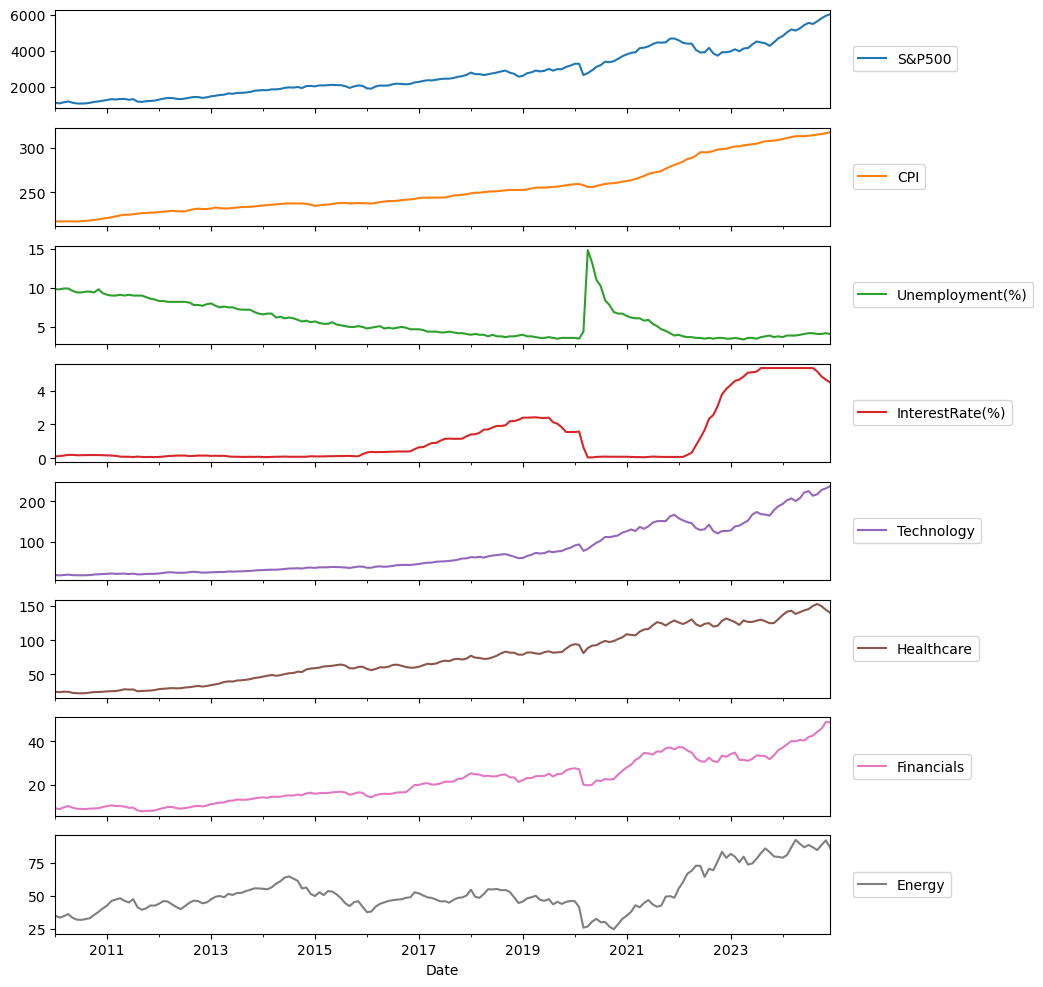

In [9]:
# Come back to this if I can't do it for all of the time frames on powerbi
axes = monthly_data.plot(x='Date', subplots=True, layout=(8,1), figsize=(10,12))

for ax in axes.flatten():
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

In [10]:
#CPI= Consumer Price Index, a way to measure inflation in the economy
monthly_data_correlation=monthly_data.corr()
monthly_data_correlation

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
Date,1.000000,0.960387,0.943079,-0.689752,0.706948,0.920510,0.984210,0.955184,0.595335
S&P500,0.960387,1.000000,0.959830,-0.615450,0.708292,0.984997,0.985070,0.989075,0.654625
CPI,0.943079,0.959830,1.000000,-0.622783,0.823104,0.963504,0.962513,0.943825,0.776257
Unemployment(%),-0.689752,-0.615450,-0.622783,1.000000,-0.570476,-0.518928,-0.651826,-0.675535,-0.574272
InterestRate(%),0.706948,0.708292,0.823104,-0.570476,1.000000,0.738170,0.701696,0.709396,0.807249
Technology,0.920510,0.984997,0.963504,-0.518928,0.738170,1.000000,0.957728,0.958876,0.668532
Healthcare,0.984210,0.985070,0.962513,-0.651826,0.701696,0.957728,1.000000,0.975865,0.636372
Financials,0.955184,0.989075,0.943825,-0.675535,0.709396,0.958876,0.975865,1.000000,0.662026
Energy,0.595335,0.654625,0.776257,-0.574272,0.807249,0.668532,0.636372,0.662026,1.000000


### Raw numbers dataframe by time periods

In [11]:
monthly_data_post_recession=monthly_data[(monthly_data['Date']>='2010-01-01') & (monthly_data['Date']<='2014-12-31')]
monthly_data_post_recession

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
0,2010-01-01,1123.581582,217.488,9.8,0.11,18.203108,24.497270,9.108149,35.065616
1,2010-02-01,1089.159989,217.281,9.8,0.13,17.354142,24.006555,8.775492,33.583454
2,2010-03-01,1152.048690,217.353,9.9,0.16,18.406723,24.666952,9.590398,34.669048
3,2010-04-01,1197.316185,217.403,9.9,0.20,19.213259,24.404023,10.188232,36.243685
4,2010-05-01,1125.062006,217.290,9.6,0.20,18.032466,22.953140,9.409370,33.420227
5,2010-06-01,1083.360895,217.199,9.4,0.18,17.600946,22.424884,8.927605,32.050624
6,2010-07-01,1079.803336,217.605,9.4,0.18,17.590327,22.224449,8.897936,31.850680
7,2010-08-01,1087.282271,217.923,9.5,0.19,17.562974,22.484402,8.765445,32.450081
8,2010-09-01,1122.081903,218.275,9.5,0.19,18.244427,23.254410,8.985925,33.128010
9,2010-10-01,1171.583810,219.035,9.4,0.19,19.421792,24.137755,9.061147,35.665649


In [12]:
monthly_data_post_recession_describe=monthly_data_post_recession.describe()
monthly_data_post_recession_describe

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2012-06-16 01:36:00,1472.187285,228.450400,8.026667,0.122667,24.848770,34.431432,11.115582,46.683564
min,2010-01-01 00:00:00,1079.803336,217.199000,5.600000,0.070000,17.354142,22.224449,7.756983,31.850680
25%,2011-03-24 06:00:00,1237.747782,223.831250,7.200000,0.090000,20.872497,25.513820,9.217787,41.228894
50%,2012-06-16 00:00:00,1387.834493,228.997000,8.200000,0.110000,24.265276,30.318359,10.180326,46.126917
75%,2013-09-08 12:00:00,1695.386761,233.575250,9.025000,0.160000,27.753551,42.196881,13.217268,52.587583
max,2014-12-01 00:00:00,2054.266363,237.498000,9.900000,0.200000,36.470741,58.377620,16.344015,64.669090
std,NaN,293.309389,6.656587,1.245448,0.041040,5.318895,10.500865,2.453068,8.601285


In [13]:
monthly_data_post_recession_correlation=monthly_data_post_recession.corr()
monthly_data_post_recession_correlation

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
Date,1.000000,0.957329,0.982749,-0.987289,-0.571692,0.964588,0.951912,0.868371,0.908797
S&P500,0.957329,1.000000,0.911614,-0.970272,-0.552104,0.987242,0.990539,0.966442,0.938842
CPI,0.982749,0.911614,1.000000,-0.957596,-0.628200,0.926272,0.896155,0.788691,0.909786
Unemployment(%),-0.987289,-0.970272,-0.957596,1.000000,0.553019,-0.979847,-0.969477,-0.898144,-0.904733
InterestRate(%),-0.571692,-0.552104,-0.628200,0.553019,1.000000,-0.528121,-0.549449,-0.441278,-0.657600
Technology,0.964588,0.987242,0.926272,-0.979847,-0.528121,1.000000,0.980285,0.929084,0.917306
Healthcare,0.951912,0.990539,0.896155,-0.969477,-0.549449,0.980285,1.000000,0.963246,0.896731
Financials,0.868371,0.966442,0.788691,-0.898144,-0.441278,0.929084,0.963246,1.000000,0.870657
Energy,0.908797,0.938842,0.909786,-0.904733,-0.657600,0.917306,0.896731,0.870657,1.000000


In [14]:
monthly_data_pre_pandemic=monthly_data[(monthly_data['Date']>='2015-01-01') & (monthly_data['Date']<='2019-12-31')]
monthly_data_pre_pandemic

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
60,2015-01-01,2028.178510,234.747,5.7,0.11,35.799418,58.944453,15.822329,49.848707
61,2015-02-01,2082.195794,235.342,5.5,0.11,37.085239,59.749839,16.124053,52.708422
62,2015-03-01,2079.990440,235.976,5.4,0.11,37.156216,61.431066,16.221548,50.588422
63,2015-04-01,2094.862839,236.222,5.4,0.12,37.308113,61.907208,16.209636,53.575571
64,2015-05-01,2111.943518,237.001,5.6,0.12,38.106644,62.416159,16.488690,53.250840
65,2015-06-01,2099.283658,237.657,5.3,0.13,37.797198,63.473110,16.641956,51.109915
66,2015-07-01,2094.143627,238.034,5.2,0.13,37.498325,64.314899,16.794145,48.129069
67,2015-08-01,2039.866205,238.033,5.1,0.14,36.669171,62.692295,16.451548,44.387699
68,2015-09-01,1944.402384,237.498,5.0,0.14,35.530181,58.785298,15.388349,42.249663
69,2015-10-01,2024.812716,237.733,5.0,0.12,37.464376,58.664299,15.864576,45.217055


In [15]:
monthly_data_pre_pandemic_describe=monthly_data_pre_pandemic.describe()
monthly_data_pre_pandemic_describe

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2017-06-16 06:24:00,2451.796089,245.776050,4.415000,1.103833,53.525340,69.930791,20.453639,48.047746
min,2015-01-01 00:00:00,1904.418494,234.747000,3.500000,0.110000,35.530181,56.071895,14.179123,37.721680
25%,2016-03-24 06:00:00,2094.683036,238.764000,3.800000,0.370000,38.969059,61.081314,16.449995,45.689279
50%,2017-06-16 00:00:00,2444.043977,244.218000,4.350000,1.095000,51.733209,68.856501,21.025295,48.124017
75%,2018-09-08 12:00:00,2762.514350,252.276750,4.925000,1.850000,65.351913,78.944834,23.960574,50.362297
max,2019-12-01 00:00:00,3176.749512,258.630000,5.700000,2.420000,84.925246,91.881525,27.355729,55.197718
std,NaN,358.629001,7.090132,0.621868,0.823099,14.461801,9.480663,3.819553,3.968205


In [16]:
monthly_data_pre_pandemic_correlation=monthly_data_pre_pandemic.corr()
monthly_data_pre_pandemic_correlation

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
Date,1.000000,0.953675,0.992726,-0.978405,0.943888,0.968343,0.932336,0.917029,0.094844
S&P500,0.953675,1.000000,0.972406,-0.938698,0.908729,0.992839,0.969025,0.974421,0.284570
CPI,0.992726,0.972406,1.000000,-0.969310,0.946589,0.982832,0.956026,0.935097,0.158934
Unemployment(%),-0.978405,-0.938698,-0.969310,1.000000,-0.935620,-0.947890,-0.906943,-0.923526,-0.107152
InterestRate(%),0.943888,0.908729,0.946589,-0.935620,1.000000,0.912248,0.914358,0.870256,0.183790
Technology,0.968343,0.992839,0.982832,-0.947890,0.912248,1.000000,0.966506,0.952829,0.201031
Healthcare,0.932336,0.969025,0.956026,-0.906943,0.914358,0.966506,1.000000,0.916394,0.203306
Financials,0.917029,0.974421,0.935097,-0.923526,0.870256,0.952829,0.916394,1.000000,0.346283
Energy,0.094844,0.284570,0.158934,-0.107152,0.183790,0.201031,0.203306,0.346283,1.000000


In [17]:
monthly_data_pandemic=monthly_data[(monthly_data['Date']>='2020-01-01') & (monthly_data['Date']<='2021-12-31')]
monthly_data_pandemic

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
120,2020-01-01,3278.202858,259.127,3.6,1.55,90.935520,93.966329,27.583935,45.975957
121,2020-02-01,3277.314183,259.250,3.5,1.58,93.469741,92.888651,27.195644,41.498346
122,2020-03-01,2652.393632,258.076,4.4,0.65,77.590171,80.871368,20.065311,25.959401
123,2020-04-01,2761.975226,256.032,14.8,0.05,82.216578,88.209743,19.750153,26.886926
124,2020-05-01,2919.608484,255.802,13.2,0.05,90.331736,91.866294,20.019673,30.511274
125,2020-06-01,3104.660933,257.042,11.0,0.08,97.403476,92.423959,22.015222,32.667905
126,2020-07-01,3207.619096,258.352,10.2,0.09,102.874342,96.159805,21.703586,30.064334
127,2020-08-01,3391.710019,259.316,8.4,0.10,111.755453,98.725633,22.637475,30.284617
128,2020-09-01,3365.516671,259.997,7.8,0.09,111.178884,97.053953,22.378747,26.830859
129,2020-10-01,3418.699996,260.319,6.9,0.09,113.510659,98.444542,22.662559,24.786234


In [18]:
monthly_data_pandemic_describe=monthly_data_pandemic.describe()
monthly_data_pandemic_describe

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
count,24,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2020-12-15 22:00:00,3742.637344,264.911833,6.729167,0.227917,121.869842,106.247816,28.441344,37.551229
min,2020-01-01 00:00:00,2652.393632,255.802000,3.500000,0.050000,77.590171,80.871368,19.750153,24.786234
25%,2020-06-23 12:00:00,3277.980689,259.219250,4.650000,0.080000,101.506626,95.611436,22.572793,30.229547
50%,2020-12-16 12:00:00,3744.529223,262.342000,6.100000,0.085000,124.079908,105.403999,27.814351,39.636168
75%,2021-06-08 12:00:00,4269.795359,271.023750,7.125000,0.090000,140.076700,117.409488,34.527974,43.798180
max,2021-12-01 00:00:00,4674.772772,280.806000,14.800000,1.580000,166.249816,128.557279,37.208551,49.801245
std,NaN,612.366013,7.545292,2.930719,0.428069,25.498815,13.672948,6.132616,8.279508


In [19]:
monthly_data_pandemic_correlation=monthly_data_pandemic.corr()
monthly_data_pandemic_correlation

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
Date,1.000000,0.959048,0.940510,-0.452550,-0.541941,0.980422,0.965447,0.881790,0.666346
S&P500,0.959048,1.000000,0.948326,-0.596128,-0.325744,0.984567,0.987690,0.959105,0.800689
CPI,0.940510,0.948326,1.000000,-0.597790,-0.277085,0.941346,0.948278,0.931017,0.801418
Unemployment(%),-0.452550,-0.596128,-0.597790,1.000000,-0.386161,-0.525407,-0.512483,-0.671362,-0.625886
InterestRate(%),-0.541941,-0.325744,-0.277085,-0.386161,1.000000,-0.443670,-0.384785,-0.128711,0.141554
Technology,0.980422,0.984567,0.941346,-0.525407,-0.443670,1.000000,0.982464,0.900775,0.706649
Healthcare,0.965447,0.987690,0.948278,-0.512483,-0.384785,0.982464,1.000000,0.933578,0.762245
Financials,0.881790,0.959105,0.931017,-0.671362,-0.128711,0.900775,0.933578,1.000000,0.914465
Energy,0.666346,0.800689,0.801418,-0.625886,0.141554,0.706649,0.762245,0.914465,1.000000


In [20]:
monthly_data_post_pandemic=monthly_data[(monthly_data['Date']>='2022-01-01') & (monthly_data['Date']<='2024-12-31')]
monthly_data_post_pandemic

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
144,2022-01-01,4573.815454,282.542,4.0,0.08,157.774663,125.657465,37.387058,55.470927
145,2022-02-01,4435.980494,284.525,3.8,0.08,152.429059,123.338362,37.253792,60.407306
146,2022-03-01,4391.265264,287.467,3.7,0.20,148.262978,126.337929,35.782621,66.672504
147,2022-04-01,4391.295996,288.582,3.7,0.33,145.334626,130.076239,34.877692,68.932424
148,2022-05-01,4040.360003,291.299,3.6,0.77,133.369095,123.064461,32.222245,72.792590
149,2022-06-01,3898.946684,295.072,3.6,1.21,128.750138,120.170059,30.880898,72.608346
150,2022-07-01,3911.729492,294.940,3.5,1.68,130.810037,123.686080,30.585165,64.345710
151,2022-08-01,4158.563084,295.162,3.6,2.33,141.886473,124.639701,32.504872,70.399464
152,2022-09-01,3850.520496,296.421,3.5,2.56,126.164154,119.695770,30.881070,69.346505
153,2022-10-01,3726.050956,297.979,3.6,3.08,120.303657,120.813634,30.493245,76.001870


In [21]:
monthly_data_post_pandemic_describe=monthly_data_post_pandemic.describe()
monthly_data_post_pandemic_describe

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
count,36,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2023-06-16 18:40:00,4604.064665,303.675806,3.769444,3.950278,170.050929,131.768118,36.268059,78.663392
min,2022-01-01 00:00:00,3726.050956,282.542000,3.400000,0.080000,120.303657,119.695770,30.493245,55.470927
25%,2022-09-23 12:00:00,4069.853544,297.589500,3.600000,2.950000,139.093432,124.724456,32.153120,73.407780
50%,2023-06-16 00:00:00,4422.537745,304.357000,3.700000,4.830000,165.327632,128.476225,34.489776,79.574229
75%,2024-03-08 18:00:00,5127.012678,312.334250,3.925000,5.330000,203.021010,139.899524,40.089369,85.901219
max,2024-12-01 00:00:00,6017.372485,317.603000,4.200000,5.330000,236.881937,152.608850,48.993115,92.242920
std,NaN,663.150496,9.523469,0.238830,1.840889,36.421143,9.312030,5.225617,8.731138


In [22]:
monthly_data_post_pandemic_correlation=monthly_data_post_pandemic.corr()
monthly_data_post_pandemic_correlation

,Date,S&P500,CPI,Unemployment(%),InterestRate(%),Technology,Healthcare,Financials,Energy
Date,1.000000,0.835611,0.981613,0.699498,0.821945,0.896512,0.829016,0.737438,0.868195
S&P500,0.835611,1.000000,0.727313,0.905573,0.410129,0.975293,0.901110,0.958603,0.603619
CPI,0.981613,0.727313,1.000000,0.576903,0.886030,0.808277,0.753794,0.619057,0.906295
Unemployment(%),0.699498,0.905573,0.576903,1.000000,0.267630,0.871237,0.802518,0.877755,0.493809
InterestRate(%),0.821945,0.410129,0.886030,0.267630,1.000000,0.545737,0.510283,0.277750,0.818088
Technology,0.896512,0.975293,0.808277,0.871237,0.545737,1.000000,0.876097,0.884358,0.654012
Healthcare,0.829016,0.901110,0.753794,0.802518,0.510283,0.876097,1.000000,0.867321,0.687404
Financials,0.737438,0.958603,0.619057,0.877755,0.277750,0.884358,0.867321,1.000000,0.546545
Energy,0.868195,0.603619,0.906295,0.493809,0.818088,0.654012,0.687404,0.546545,1.000000


### % change numbers dataframe by time periods

In [23]:
monthly_data_changes = monthly_data.copy()

In [24]:
monthly_data_changes['S&P500_Change(%)'] = monthly_data['S&P500'].pct_change()*100
monthly_data_changes['Technology_Change(%)'] = monthly_data['Technology'].pct_change()*100
monthly_data_changes['Healthcare_Change(%)'] = monthly_data['Healthcare'].pct_change()*100
monthly_data_changes['Financials_Change(%)'] = monthly_data['Financials'].pct_change()*100
monthly_data_changes['Energy_Change(%)'] = monthly_data['Energy'].pct_change()*100
monthly_data_changes['CPI_Change(%)'] = monthly_data['CPI'].pct_change()*100
monthly_data_changes['Unemployment_Change(pp)'] = monthly_data['Unemployment(%)'].pct_change()*100
monthly_data_changes['InterestRate_Change(pp)'] = monthly_data['InterestRate(%)'].pct_change()*100
monthly_data_changes = monthly_data_changes.dropna()

In [25]:
monthly_data_changes=monthly_data_changes[['Date','S&P500_Change(%)','Technology_Change(%)','Healthcare_Change(%)','Financials_Change(%)','Energy_Change(%)','CPI_Change(%)','Unemployment_Change(pp)','InterestRate_Change(pp)']]
monthly_data_changes

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
1,2010-02-01,-3.063560,-4.663851,-2.003144,-3.652301,-4.226825,-0.095178,0.000000,18.181818
2,2010-03-01,5.774055,6.065298,2.750904,9.286157,3.232527,0.033137,1.020408,23.076923
3,2010-04-01,3.929304,4.381747,-1.065914,6.233665,4.541909,0.023004,0.000000,25.000000
4,2010-05-01,-6.034678,-6.145720,-5.945263,-7.644723,-7.790206,-0.051977,-3.030303,0.000000
5,2010-06-01,-3.706561,-2.393018,-2.301454,-5.120054,-4.098127,-0.041880,-2.083333,-10.000000
...,...,...,...,...,...,...,...,...,...
175,2024-08-01,-1.079631,-5.077870,3.242512,1.716308,-1.996426,0.180185,0.000000,0.000000
176,2024-09-01,2.611177,1.627682,1.840699,3.920124,-2.446708,0.229204,-2.380952,-3.752345
177,2024-10-01,3.043074,4.948433,-2.108133,3.450581,4.630543,0.226456,0.000000,-5.847953
178,2024-11-01,2.375498,1.696099,-3.561407,6.655870,3.926533,0.280450,2.439024,-3.933747


In [26]:
monthly_data_changes_describe=monthly_data_changes.describe()
monthly_data_changes_describe

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
count,179,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2017-07-01 12:52:17.430167552,0.996543,1.524235,1.021693,1.045180,0.709299,0.212115,0.240114,4.811022
min,2010-02-01 00:00:00,-19.068070,-16.988995,-12.937299,-26.218659,-37.444733,-0.792015,-17.647059,-92.307692
25%,2013-10-16 12:00:00,-0.434616,-0.391868,-0.900040,-1.042130,-2.779808,0.054459,-2.777778,0.000000
50%,2017-07-01 00:00:00,1.490824,1.871910,1.431045,1.030268,1.204948,0.210689,0.000000,0.000000
75%,2021-03-16 12:00:00,3.019234,4.023608,3.071871,3.890347,4.718394,0.334629,1.042119,8.397436
max,2024-12-01 00:00:00,6.338262,9.870465,9.074132,9.967941,15.583085,1.295233,236.363636,150.000000
std,NaN,3.256890,4.000214,2.978027,4.442864,6.228559,0.265728,18.180470,23.099131


In [27]:
monthly_data_changes_correlation=monthly_data_changes.corr()
monthly_data_changes_correlation

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.038505,0.077968,-0.068868,0.043934,0.039866,0.291447,0.041726,0.101762
S&P500_Change(%),0.038505,1.000000,0.912937,0.741447,0.855584,0.574321,0.105330,-0.000562,-0.103267
Technology_Change(%),0.077968,0.912937,1.000000,0.596651,0.660705,0.386804,0.065473,0.021530,-0.119854
Healthcare_Change(%),-0.068868,0.741447,0.596651,1.000000,0.583119,0.351208,0.003563,0.145940,-0.105711
Financials_Change(%),0.043934,0.855584,0.660705,0.583119,1.000000,0.643133,0.167375,-0.109449,-0.050322
Energy_Change(%),0.039866,0.574321,0.386804,0.351208,0.643133,1.000000,0.408009,-0.014413,0.080313
CPI_Change(%),0.291447,0.105330,0.065473,0.003563,0.167375,0.408009,1.000000,-0.320585,0.333596
Unemployment_Change(pp),0.041726,-0.000562,0.021530,0.145940,-0.109449,-0.014413,-0.320585,1.000000,-0.347929
InterestRate_Change(pp),0.101762,-0.103267,-0.119854,-0.105711,-0.050322,0.080313,0.333596,-0.347929,1.000000


In [28]:
monthly_data_changes_post_recession=monthly_data_changes[(monthly_data_changes['Date']>='2010-01-01') & (monthly_data_changes['Date']<='2014-12-31')]
monthly_data_changes_post_recession

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
1,2010-02-01,-3.063560,-4.663851,-2.003144,-3.652301,-4.226825,-0.095178,0.000000,18.181818
2,2010-03-01,5.774055,6.065298,2.750904,9.286157,3.232527,0.033137,1.020408,23.076923
3,2010-04-01,3.929304,4.381747,-1.065914,6.233665,4.541909,0.023004,0.000000,25.000000
4,2010-05-01,-6.034678,-6.145720,-5.945263,-7.644723,-7.790206,-0.051977,-3.030303,0.000000
5,2010-06-01,-3.706561,-2.393018,-2.301454,-5.120054,-4.098127,-0.041880,-2.083333,-10.000000
6,2010-07-01,-0.328382,-0.060328,-0.893807,-0.332321,-0.623837,0.186925,0.000000,0.000000
7,2010-08-01,0.692620,-0.155500,1.169673,-1.489012,1.881909,0.146136,1.063830,5.555556
8,2010-09-01,3.200607,3.880054,3.424628,2.515325,2.089145,0.161525,0.000000,0.000000
9,2010-10-01,4.411613,6.453283,3.798615,0.837116,7.660100,0.348185,-1.052632,0.000000
10,2010-11-01,2.330585,3.081649,0.072250,1.697904,6.324526,0.253384,4.255319,0.000000


In [29]:
monthly_data_changes_post_recession_describe=monthly_data_changes_post_recession.describe()
monthly_data_changes_post_recession_describe

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
count,59,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2012-07-01 06:30:30.508474624,1.071196,1.237847,1.519555,1.077975,0.751124,0.140557,-0.923401,1.195093
min,2010-02-01 00:00:00,-10.555425,-8.319404,-9.438319,-13.811192,-12.681879,-0.308461,-7.462687,-28.571429
25%,2011-04-16 00:00:00,-0.310208,-0.107914,0.649040,-0.877133,-2.204078,0.015082,-2.247475,-10.000000
50%,2012-07-01 00:00:00,1.590319,1.451521,1.753022,1.422603,1.849567,0.184449,-1.052632,0.000000
75%,2013-09-16 00:00:00,3.017414,3.446574,3.198099,3.376462,4.267585,0.257694,0.000000,11.805556
max,2014-12-01 00:00:00,5.774055,6.871711,6.958650,9.286157,8.031706,0.580953,4.255319,42.857143
std,NaN,2.940213,3.279315,2.723487,4.052620,4.445031,0.199248,2.031874,14.766763


In [30]:
monthly_data_changes_post_recession_correlation=monthly_data_changes_post_recession.corr()
monthly_data_changes_post_recession_correlation

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.096711,0.100480,0.301781,0.162823,-0.109117,-0.223083,-0.195740,-0.012966
S&P500_Change(%),0.096711,1.000000,0.925727,0.794302,0.928501,0.801907,0.197834,-0.012392,-0.166162
Technology_Change(%),0.100480,0.925727,1.000000,0.667920,0.823653,0.714385,0.230147,0.001011,-0.148334
Healthcare_Change(%),0.301781,0.794302,0.667920,1.000000,0.692766,0.468514,0.084898,0.063877,-0.269340
Financials_Change(%),0.162823,0.928501,0.823653,0.692766,1.000000,0.690898,0.115084,-0.076644,-0.024584
Energy_Change(%),-0.109117,0.801907,0.714385,0.468514,0.690898,1.000000,0.439889,-0.003046,-0.247639
CPI_Change(%),-0.223083,0.197834,0.230147,0.084898,0.115084,0.439889,1.000000,-0.114073,-0.217230
Unemployment_Change(pp),-0.195740,-0.012392,0.001011,0.063877,-0.076644,-0.003046,-0.114073,1.000000,-0.047884
InterestRate_Change(pp),-0.012966,-0.166162,-0.148334,-0.269340,-0.024584,-0.247639,-0.217230,-0.047884,1.000000


In [31]:
monthly_data_changes_pre_pandemic=monthly_data_changes[(monthly_data_changes['Date']>='2015-01-01') & (monthly_data_changes['Date']<='2019-12-31')]
monthly_data_changes_pre_pandemic

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
60,2015-01-01,-1.269935,-1.840718,0.970975,-3.191905,-3.135122,-0.637032,1.785714,-8.333333
61,2015-02-01,2.663340,3.591738,1.366348,1.906948,5.736790,0.253464,-3.508772,0.000000
62,2015-03-01,-0.105915,0.191389,2.813777,0.604657,-4.022128,0.269395,-1.818182,0.000000
63,2015-04-01,0.715023,0.408805,0.775083,-0.073436,5.904807,0.104248,0.000000,9.090909
64,2015-05-01,0.815360,2.140369,0.822120,1.721537,-0.606116,0.329775,3.703704,0.000000
65,2015-06-01,-0.599441,-0.812053,1.693392,0.929521,-4.020454,0.276792,-5.357143,8.333333
66,2015-07-01,-0.244847,-0.790728,1.326214,0.914491,-5.832226,0.158632,-1.886792,0.000000
67,2015-08-01,-2.591867,-2.211175,-2.522906,-2.039980,-7.773618,-0.000420,-1.923077,7.692308
68,2015-09-01,-4.679906,-3.106125,-6.232021,-6.462607,-4.816731,-0.224759,-1.960784,0.000000
69,2015-10-01,4.135478,5.443808,-0.205832,3.094722,7.023470,0.098948,0.000000,-14.285714


In [32]:
monthly_data_changes_pre_pandemic_describe=monthly_data_changes_pre_pandemic.describe()
monthly_data_changes_pre_pandemic_describe

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2017-06-16 06:24:00,0.762580,1.471401,0.794000,0.930638,-0.068322,0.151121,-0.700485,5.212247
min,2015-01-01 00:00:00,-6.595736,-6.932926,-6.232021,-8.982738,-9.799876,-0.637032,-5.882353,-15.300546
25%,2016-03-24 06:00:00,-0.619555,-0.541511,-0.898336,-0.257731,-2.867099,0.057063,-2.439024,0.000000
50%,2017-06-16 00:00:00,1.298988,1.792956,0.798601,0.682055,0.605064,0.181827,0.000000,0.869565
75%,2018-09-08 12:00:00,2.449727,3.709441,2.995320,3.021609,2.760081,0.271244,2.000000,7.852564
max,2019-12-01 00:00:00,6.171732,8.485442,6.042824,9.650803,9.805975,0.510639,5.263158,100.000000
std,NaN,2.600276,3.282519,2.677741,3.730511,4.799499,0.188727,2.588964,15.555588


In [33]:
monthly_data_changes_pre_pandemic_correlation=monthly_data_changes_pre_pandemic.corr()
monthly_data_changes_pre_pandemic_correlation

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.125242,0.150728,0.128991,0.087106,0.017167,0.212444,0.051041,-0.226743
S&P500_Change(%),0.125242,1.000000,0.913417,0.733643,0.844072,0.763203,0.376252,-0.039916,-0.223707
Technology_Change(%),0.150728,0.913417,1.000000,0.591526,0.674574,0.655568,0.396125,0.038014,-0.235909
Healthcare_Change(%),0.128991,0.733643,0.591526,1.000000,0.571535,0.395805,0.247948,-0.055364,-0.118937
Financials_Change(%),0.087106,0.844072,0.674574,0.571535,1.000000,0.622008,0.346090,-0.119810,-0.168294
Energy_Change(%),0.017167,0.763203,0.655568,0.395805,0.622008,1.000000,0.415921,-0.016386,-0.257807
CPI_Change(%),0.212444,0.376252,0.396125,0.247948,0.346090,0.415921,1.000000,0.011437,-0.170914
Unemployment_Change(pp),0.051041,-0.039916,0.038014,-0.055364,-0.119810,-0.016386,0.011437,1.000000,-0.128837
InterestRate_Change(pp),-0.226743,-0.223707,-0.235909,-0.118937,-0.168294,-0.257807,-0.170914,-0.128837,1.000000


In [34]:
monthly_data_changes_pandemic=monthly_data_changes[(monthly_data_changes['Date']>='2020-01-01') & (monthly_data_changes['Date']<='2021-12-31')]
monthly_data_changes_pandemic

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
120,2020-01-01,3.193621,7.077135,2.269014,0.834218,-0.302760,0.192166,0.000000,0.000000
121,2020-02-01,-0.027109,2.786833,-1.146877,-1.407670,-9.739027,0.047467,-2.777778,1.935484
122,2020-03-01,-19.068070,-16.988995,-12.937299,-26.218659,-37.444733,-0.452845,25.714286,-58.860759
123,2020-04-01,4.131423,5.962620,9.074132,-1.570663,3.572982,-0.792015,236.363636,-92.307692
124,2020-05-01,5.707265,9.870465,4.145292,1.364651,13.479967,-0.089833,-10.810811,0.000000
125,2020-06-01,6.338262,7.828632,0.607040,9.967941,7.068306,0.484750,-16.666667,60.000000
126,2020-07-01,3.316245,5.616705,4.042075,-1.415550,-7.969811,0.509644,-7.272727,12.500000
127,2020-08-01,5.739177,8.632970,2.668296,4.302926,0.732706,0.373134,-17.647059,11.111111
128,2020-09-01,-0.772276,-0.515920,-1.693258,-1.142919,-11.404333,0.262614,-7.142857,-10.000000
129,2020-10-01,1.580242,2.097318,1.432800,1.268222,-7.620422,0.123848,-11.538462,0.000000


In [35]:
monthly_data_changes_pandemic_describe=monthly_data_changes_pandemic.describe()
monthly_data_changes_pandemic_describe

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
count,24,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2020-12-15 22:00:00,1.750073,2.993758,1.491684,1.452230,0.956852,0.344114,5.540645,-3.179019
min,2020-01-01 00:00:00,-19.068070,-16.988995,-12.937299,-26.218659,-37.444733,-0.792015,-17.647059,-92.307692
25%,2020-06-23 12:00:00,0.568350,1.448502,-0.658877,-1.209107,-4.819878,0.218051,-7.415330,-10.277778
50%,2020-12-16 12:00:00,2.513930,3.196173,2.461990,1.316436,1.596958,0.403883,-4.697822,0.000000
75%,2021-06-08 12:00:00,4.124949,6.648892,3.902822,4.892991,7.990796,0.549041,-1.209677,0.483871
max,2021-12-01 00:00:00,6.338262,9.870465,9.074132,9.967941,15.583085,0.943995,236.363636,60.000000
std,NaN,4.910307,5.559525,4.075075,6.950663,11.651226,0.396554,49.820899,28.106599


In [36]:
monthly_data_changes_pandemic_correlation=monthly_data_changes_pandemic.corr()
monthly_data_changes_pandemic_correlation

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.124261,0.005508,0.120516,0.245419,0.276859,0.717375,-0.276339,0.200121
S&P500_Change(%),0.124261,1.000000,0.924423,0.846133,0.841775,0.699626,0.320621,-0.027040,0.452167
Technology_Change(%),0.005508,0.924423,1.000000,0.788416,0.602703,0.490955,0.219452,-0.003746,0.459586
Healthcare_Change(%),0.120516,0.846133,0.788416,1.000000,0.603698,0.495378,0.058821,0.292145,0.098731
Financials_Change(%),0.245419,0.841775,0.602703,0.603698,1.000000,0.847826,0.447271,-0.202548,0.468943
Energy_Change(%),0.276859,0.699626,0.490955,0.495378,0.847826,1.000000,0.358016,-0.030895,0.266682
CPI_Change(%),0.717375,0.320621,0.219452,0.058821,0.447271,0.358016,1.000000,-0.647874,0.686739
Unemployment_Change(pp),-0.276339,-0.027040,-0.003746,0.292145,-0.202548,-0.030895,-0.647874,1.000000,-0.745696
InterestRate_Change(pp),0.200121,0.452167,0.459586,0.098731,0.468943,0.266682,0.686739,-0.745696,1.000000


In [37]:
monthly_data_changes_post_pandemic=monthly_data_changes[(monthly_data_changes['Date']>='2022-01-01') & (monthly_data_changes['Date']<='2024-12-31')]
monthly_data_changes_post_pandemic

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
144,2022-01-01,-2.159620,-5.097842,-2.255659,2.882509,14.236426,0.618220,2.564103,0.000000
145,2022-02-01,-3.013566,-3.388125,-1.845575,-0.356449,8.899037,0.701843,-5.000000,0.000000
146,2022-03-01,-1.008012,-2.733128,2.431982,-3.949052,10.371590,1.034004,-2.631579,150.000000
147,2022-04-01,0.000700,-1.975107,2.958976,-2.528961,3.389584,0.387871,0.000000,65.000000
148,2022-05-01,-7.991627,-8.233090,-5.390514,-7.613598,5.599927,0.941500,-2.702703,133.333333
149,2022-06-01,-3.500018,-3.463289,-2.351940,-4.162796,-0.253107,1.295233,0.000000,57.142857
150,2022-07-01,0.327853,1.599920,2.925871,-0.957659,-11.379733,-0.044735,-2.777778,38.842975
151,2022-08-01,6.310088,8.467573,0.771001,6.276595,9.408170,0.075270,2.857143,38.690476
152,2022-09-01,-7.407429,-11.080914,-3.966578,-4.995565,-1.495693,0.426545,-2.777778,9.871245
153,2022-10-01,-3.232538,-4.645136,0.933921,-1.255866,9.597261,0.525604,2.857143,20.312500


In [38]:
monthly_data_changes_post_pandemic_describe=monthly_data_changes_post_pandemic.describe()
monthly_data_changes_post_pandemic_describe

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
count,36,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2023-06-16 18:40:00,0.761778,1.101971,0.271915,0.910967,1.771755,0.343048,0.180964,15.395113
min,2022-01-01 00:00:00,-7.991627,-11.080914,-5.390514,-9.687526,-11.379733,-0.044735,-5.128205,-5.847953
25%,2022-09-23 12:00:00,-1.123712,-2.819564,-2.140370,-1.298282,-2.715000,0.148686,-2.649360,0.000000
50%,2023-06-16 00:00:00,1.354377,1.619127,0.852461,0.845574,2.287125,0.285848,0.000000,0.197628
75%,2024-03-08 18:00:00,3.232644,4.620839,2.522164,3.892584,5.604979,0.409441,2.580972,8.817018
max,2024-12-01 00:00:00,6.310088,9.630214,5.892238,9.637458,14.236426,1.295233,5.882353,150.000000
std,NaN,3.439266,4.824674,2.928411,4.219820,5.854607,0.292146,2.943034,35.268709


In [39]:
monthly_data_changes_post_pandemic_correlation=monthly_data_changes_post_pandemic.corr()
monthly_data_changes_post_pandemic_correlation

,Date,S&P500_Change(%),Technology_Change(%),Healthcare_Change(%),Financials_Change(%),Energy_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.433088,0.360279,0.065685,0.374703,-0.320680,-0.488291,0.203425,-0.574965
S&P500_Change(%),0.433088,1.000000,0.911546,0.567738,0.802978,-0.032973,-0.499639,0.174807,-0.379314
Technology_Change(%),0.360279,0.911546,1.000000,0.366675,0.583818,-0.226219,-0.527187,0.146162,-0.354765
Healthcare_Change(%),0.065685,0.567738,0.366675,1.000000,0.436880,0.005926,-0.281711,0.014470,-0.040502
Financials_Change(%),0.374703,0.802978,0.583818,0.436880,1.000000,0.239479,-0.321806,0.202888,-0.427312
Energy_Change(%),-0.320680,-0.032973,-0.226219,0.005926,0.239479,1.000000,0.482288,0.108323,0.248627
CPI_Change(%),-0.488291,-0.499639,-0.527187,-0.281711,-0.321806,0.482288,1.000000,-0.126360,0.600986
Unemployment_Change(pp),0.203425,0.174807,0.146162,0.014470,0.202888,0.108323,-0.126360,1.000000,-0.217160
InterestRate_Change(pp),-0.574965,-0.379314,-0.354765,-0.040502,-0.427312,0.248627,0.600986,-0.217160,1.000000


In [49]:
#monthly_data
with pd.ExcelWriter("monthly_data.xlsx") as writer:
    monthly_data.to_excel(writer, sheet_name="monthly_data")
    monthly_data_describe.to_excel(writer, sheet_name="monthly_data_describe")
    monthly_data_correlation.to_excel(writer,sheet_name="monthly_data_correlation")

In [50]:
#monthly_data_post_recession
with pd.ExcelWriter("monthly_data_post_recession.xlsx") as writer:
    monthly_data_post_recession.to_excel(writer, sheet_name="post_recession_dataframe")
    monthly_data_post_recession_describe.to_excel(writer, sheet_name="post_recession_describe")
    monthly_data_post_recession_correlation.to_excel(writer,sheet_name="post_recession_correlation")

In [51]:
#monthly_data_pre_pandemic
with pd.ExcelWriter("monthly_data_pre_pandemic.xlsx") as writer:
    monthly_data_pre_pandemic.to_excel(writer, sheet_name="pre_pandemic_dataframe")
    monthly_data_pre_pandemic_describe.to_excel(writer, sheet_name="pre_pandemic_describe")
    monthly_data_pre_pandemic_correlation.to_excel(writer,sheet_name="pre_pandemic_correlation")

In [52]:
#monthly_data_pandemic
with pd.ExcelWriter("monthly_data_pandemic.xlsx") as writer:
    monthly_data_pandemic.to_excel(writer, sheet_name="pandemic_dataframe")
    monthly_data_pandemic_describe.to_excel(writer, sheet_name="pandemic_describe")
    monthly_data_pandemic_correlation.to_excel(writer,sheet_name="pandemic_correlation")

In [53]:
#monthly_data_post_pandemic
with pd.ExcelWriter("monthly_data_post_pandemic.xlsx") as writer:
    monthly_data_post_pandemic.to_excel(writer, sheet_name="post_pandemic_dataframe")
    monthly_data_post_pandemic_describe.to_excel(writer, sheet_name="post_pandemic_describe")
    monthly_data_post_pandemic_correlation.to_excel(writer,sheet_name="post_pandemic_correlation")

In [55]:
#monthly_data_changes
with pd.ExcelWriter("changes.xlsx") as writer:
    monthly_data_changes.to_excel(writer, sheet_name="changes_dataframe")
    monthly_data_changes_describe.to_excel(writer, sheet_name="changes_describe")
    monthly_data_changes_correlation.to_excel(writer,sheet_name="changes_correlation")

In [56]:
#monthly_data_changes_post_recession
with pd.ExcelWriter("changes_post_recession.xlsx") as writer:
    monthly_data_changes_post_recession.to_excel(writer, sheet_name="changes_post_recession")
    monthly_data_changes_post_recession_describe.to_excel(writer, sheet_name="post_recession_describe")
    monthly_data_changes_post_recession_correlation.to_excel(writer,sheet_name="post_recession_correlation")

In [57]:
#monthly_data_changes_pre_pandemic
with pd.ExcelWriter("changes_pre_pandemic.xlsx") as writer:
    monthly_data_changes_pre_pandemic.to_excel(writer, sheet_name="changes_pre_pandemic")
    monthly_data_changes_pre_pandemic_describe.to_excel(writer, sheet_name="pre_pandemic_describe")
    monthly_data_changes_pre_pandemic_correlation.to_excel(writer,sheet_name="pre_pandemic_correlation")

In [58]:
#monthly_data_changes_pandemic
with pd.ExcelWriter("changes_pandemic.xlsx") as writer:
    monthly_data_changes_pandemic.to_excel(writer, sheet_name="changes_pandemic")
    monthly_data_changes_pandemic_describe.to_excel(writer, sheet_name="pandemic_describe")
    monthly_data_changes_pandemic_correlation.to_excel(writer,sheet_name="pandemic_correlation")

In [59]:
#monthly_data_changes_post_pandemic
with pd.ExcelWriter("changes_post_pandemic.xlsx") as writer:
    monthly_data_changes_post_pandemic.to_excel(writer, sheet_name="changes_post_pandemic")
    monthly_data_changes_post_pandemic_describe.to_excel(writer, sheet_name="post_pandemic_describe")
    monthly_data_changes_post_pandemic_correlation.to_excel(writer,sheet_name="post_pandemic_correlation")